Linear models assume that the independent variables are normally distributed. In this recipe, we will learn how to assess normal distributions of variables.

In [1]:
import pandas as pd
import numpy as np

# for plotting
import matplotlib.pyplot as plt
import seaborn as sns

# for the Q-Q plots
import scipy.stats as stats

# the dataset for the demo
from sklearn.datasets import load_boston

In [2]:
# load the the Boston House price data

# this is how we load the boston dataset from sklearn
boston_dataset = load_boston()

# create a dataframe with the independent variables
boston = pd.DataFrame(boston_dataset.data,
                      columns=boston_dataset.feature_names)


boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [3]:
# this is the information about the boston house prince dataset
# get familiar with the variables before continuing with 
# the notebook

# the aim is to predict the "Median value of the houses"
# MEDV column of this dataset

# and we have variables with characteristics about
# the homes and the neighborhoods

print(boston_dataset.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [4]:
# I will create a dataframe with the variable x that
# follows a normal distribution 

# this will provide the expected plots
# i.e., how the plots should look like if the
# assumption is met

np.random.seed(29) # for reproducibility

n = 200 # in the book, we pass 200 within brackets directly, without defining n
x = np.random.randn(n)

data = pd.DataFrame([x]).T
data.columns = ['x']
data.head()

,x
0,-0.417482
1,0.706032
2,1.915985
3,-2.141755
4,0.719057


Normality can be assessed by histograms:

C:\Users\TURBULENCE\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='x', ylabel='Density'>

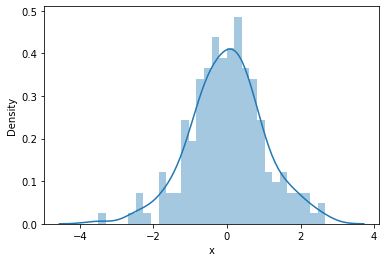

In [5]:
# histogram of the simulated independent variable x
# which we know follows a Gaussian distribution

sns.distplot(data['x'], bins=30)

C:\Users\TURBULENCE\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='RM', ylabel='Density'>

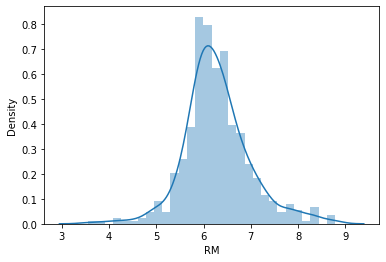

In [6]:
# histogram of the variable RM from the boston
# house price dataset from sklearn
# RM is the average number of rooms per dwelling

sns.distplot(boston['RM'], bins=30)

C:\Users\TURBULENCE\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='LSTAT', ylabel='Density'>

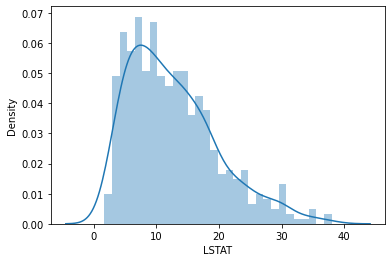

In [7]:
# histogram of the variable LSTAT
# (% lower status of the population)

sns.distplot(boston['LSTAT'], bins=30)

Normality can be also assessed by Q-Q plots. In a Q-Q plot we plot the quantiles of the variable in the y-axis and the expected quantiles of the normal distribution in the x-axis. If the variable follows a normal distribution, the dots in the Q-Q plot should fall in a 45 degree diagonal line as indicated below.  

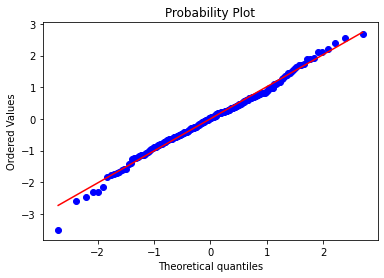

In [8]:
# let's plot the Q-Q plot for the simualted data.
# the dots should adjust to the 45 degree line

stats.probplot(data['x'], dist="norm", plot=plt)
plt.show()

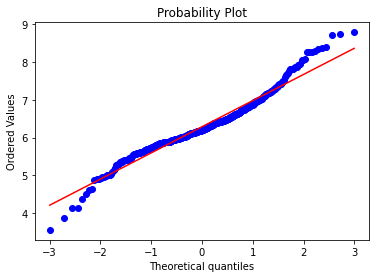

In [9]:
# let's do the same for RM
stats.probplot(boston['RM'], dist="norm", plot=plt)
plt.show()

Most of the observations of RM fall on the 45 degree line, which suggests that the distribution is approximately Gaussian, with some deviation towards the larger and smaller values of the variable. 

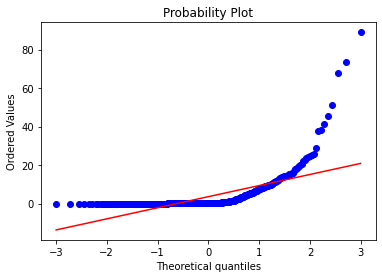

In [10]:
# just for comparison, let's go ahead and plot CRIM
stats.probplot(boston['CRIM'], dist="norm", plot=plt)
plt.show()

CRIM does not follow a Gaussian distribution as most of its observations deviate from the 45 degree line in the Q-Q plot.